In [2]:
using HDF5
using Plots

In [9]:
h = h5read("./solve_gw_out/solve_gw_out_h.h5","h")
h_t = h5read("./solve_gw_out/solve_gw_out_h_t.h5","h_t")
kx = h5read("./solve_gw_out/solve_gw_out_kx.h5","kx")
ky = h5read("./solve_gw_out/solve_gw_out_ky.h5","ky")
pxk = h5read("./solve_gw_out/solve_gw_out_pxk.h5","pxk")
pyk = h5read("./solve_gw_out/solve_gw_out_pyk.h5","pyk")
pzk = h5read("./solve_gw_out/solve_gw_out_pzk.h5","pzk")
t = h5read("./solve_gw_out/solve_gw_out_t.h5","t");

In [10]:
h_t_ijsum = sum(real.(h_t.*conj(h_t)),dims=4);

In [159]:
k2 = zeros(length(kx),length(ky));
for i in 1:length(kx)
    for j in 1:length(ky)
        k2[i,j] = sqrt(kx[i]^2 + ky[j]^2)
    end
end
k2 = [(k2...)...]
k2unique = unique(sort(k2))

712-element Array{Float64,1}:
  0.0
  0.3141592653589793
  0.4442882938158366
  0.6283185307179586
  0.7024814731040726
  0.8885765876316732
  0.9424777960769379
  0.99345882657961
  1.1327173399138977
  1.2566370614359172
  1.2953118343415189
  1.33286488144751
  1.4049629462081452
  ⋮
 16.66229191325862
 16.67413433970973
 16.697793995937737
 16.882955165001793
 16.888800051853373
 16.9063225881783
 17.106541745551596
 17.11807683907112
 17.327243458817627
 17.33293852666535
 17.550793525023273
 17.771531752633464

In [160]:
#h_t_ijsum_sort_end = sortslices(hcat(k2,[(h_t_ijsum[end,:,:,1]...)...]),dims=1)

In [161]:
test_all = []
for it in 1:length(t)

    h_t_ijsum_sort_end = sortslices(hcat(k2,[(h_t_ijsum[it,:,:,1]...)...]),dims=1)

    test = zeros(0)
    k2_tmp = h_t_ijsum_sort_end[1,1]
    h_t_temp = 0.0
    for i in 1:length(k2)
        if h_t_ijsum_sort_end[i,1]==k2_tmp
            h_t_temp += h_t_ijsum_sort_end[i,2]
        else
            append!(test, k2_tmp^2*h_t_temp)
            k2_tmp = h_t_ijsum_sort_end[i,1]
            h_t_temp = h_t_ijsum_sort_end[i,2]
        end
    end
    append!(test, h_t_temp)

    append!(test_all, test)
end

In [162]:
test_all_mat = reshape(test_all, length(k2unique), length(t))

712×9005 Array{Any,2}:
 0.0          0.0          0.0          …  0.0          0.0
 2.26269e-16  3.62027e-15  1.83271e-14     5.37535e-5   5.37377e-5
 2.68341e-16  4.29337e-15  2.1734e-14      9.79017e-6   1.01985e-5
 2.30483e-17  3.68758e-16  1.86663e-15     1.19424e-16  1.41429e-16
 7.39176e-17  1.18262e-15  5.98619e-15     1.37277e-11  3.80693e-11
 1.4336e-18   2.29358e-17  1.16087e-16  …  4.93739e-7   4.86865e-7
 5.87842e-18  9.40464e-17  4.7599e-16      4.29532e-6   4.28431e-6
 2.00991e-18  3.21553e-17  1.62741e-16     5.46878e-7   5.48509e-7
 4.93739e-18  7.89881e-17  3.99731e-16     5.96098e-10  6.66305e-10
 2.70477e-18  4.32694e-17  2.18953e-16     8.28942e-16  1.41319e-15
 2.00749e-18  3.21145e-17  1.62502e-16  …  7.32856e-10  7.5182e-10
 1.57749e-18  2.52353e-17  1.27689e-16     3.49468e-10  3.42208e-10
 1.08469e-18  1.73516e-17  8.77928e-17     2.41392e-9   2.64821e-9
 ⋮                                      ⋱               
 3.4811e-34   5.41877e-33  2.52703e-32  …  8.39683e

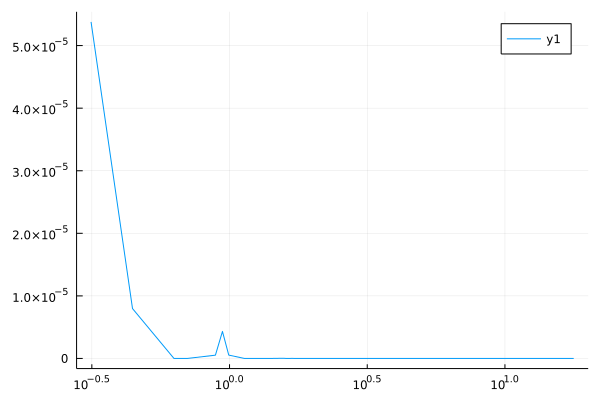

In [180]:
it = 9000;
plot(k2unique[2:end], test_all_mat[2:end,it], xscale=:log10)

In [177]:
dt = t[2] - t[1];
test_all_sum = dt*sum(test_all_mat, dims=2)

712×1 Array{Float64,2}:
 0.0
 0.004551302561390253
 0.005723798197446933
 7.095609404852699e-5
 7.746506577033029e-6
 4.879926153791627e-5
 0.0003314334792450418
 4.2049432754750014e-5
 1.343310918304019e-6
 3.286268156249542e-7
 6.14451582097393e-7
 9.836097437620884e-8
 1.0363650954445913e-6
 ⋮
 8.901591856491511e-26
 1.260712622888934e-25
 1.076414097414525e-25
 1.7273671939941966e-26
 1.9934254111460445e-25
 3.845289002092365e-25
 2.419297308799877e-27
 2.261778240819534e-26
 2.2075724609384564e-25
 3.0466668073034455e-25
 2.1666327802248043e-27
 3.708397661214884e-28

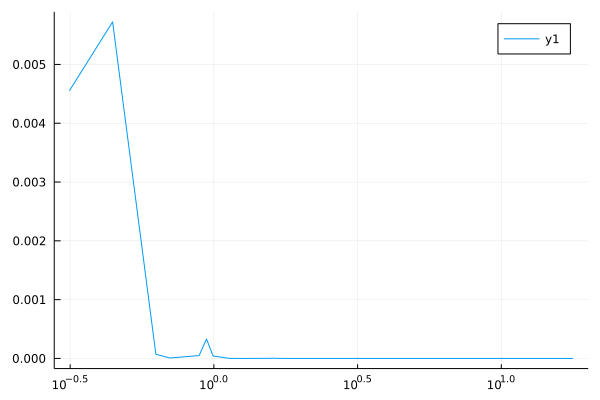

In [186]:
plot(k2unique[2:end], test_all_sum[2:end,1], xscale=:log10)

In [181]:
test_all_sum

712×1 Array{Float64,2}:
 0.0
 0.004551302561390253
 0.005723798197446933
 7.095609404852699e-5
 7.746506577033029e-6
 4.879926153791627e-5
 0.0003314334792450418
 4.2049432754750014e-5
 1.343310918304019e-6
 3.286268156249542e-7
 6.14451582097393e-7
 9.836097437620884e-8
 1.0363650954445913e-6
 ⋮
 8.901591856491511e-26
 1.260712622888934e-25
 1.076414097414525e-25
 1.7273671939941966e-26
 1.9934254111460445e-25
 3.845289002092365e-25
 2.419297308799877e-27
 2.261778240819534e-26
 2.2075724609384564e-25
 3.0466668073034455e-25
 2.1666327802248043e-27
 3.708397661214884e-28

In [182]:
k2unique

712-element Array{Float64,1}:
  0.0
  0.3141592653589793
  0.4442882938158366
  0.6283185307179586
  0.7024814731040726
  0.8885765876316732
  0.9424777960769379
  0.99345882657961
  1.1327173399138977
  1.2566370614359172
  1.2953118343415189
  1.33286488144751
  1.4049629462081452
  ⋮
 16.66229191325862
 16.67413433970973
 16.697793995937737
 16.882955165001793
 16.888800051853373
 16.9063225881783
 17.106541745551596
 17.11807683907112
 17.327243458817627
 17.33293852666535
 17.550793525023273
 17.771531752633464